# Tut-16 : CodeBasics 

Hyper parameter tuning :
    The process of choosing optimal parameter is called Hyper Tuning 
    
    
   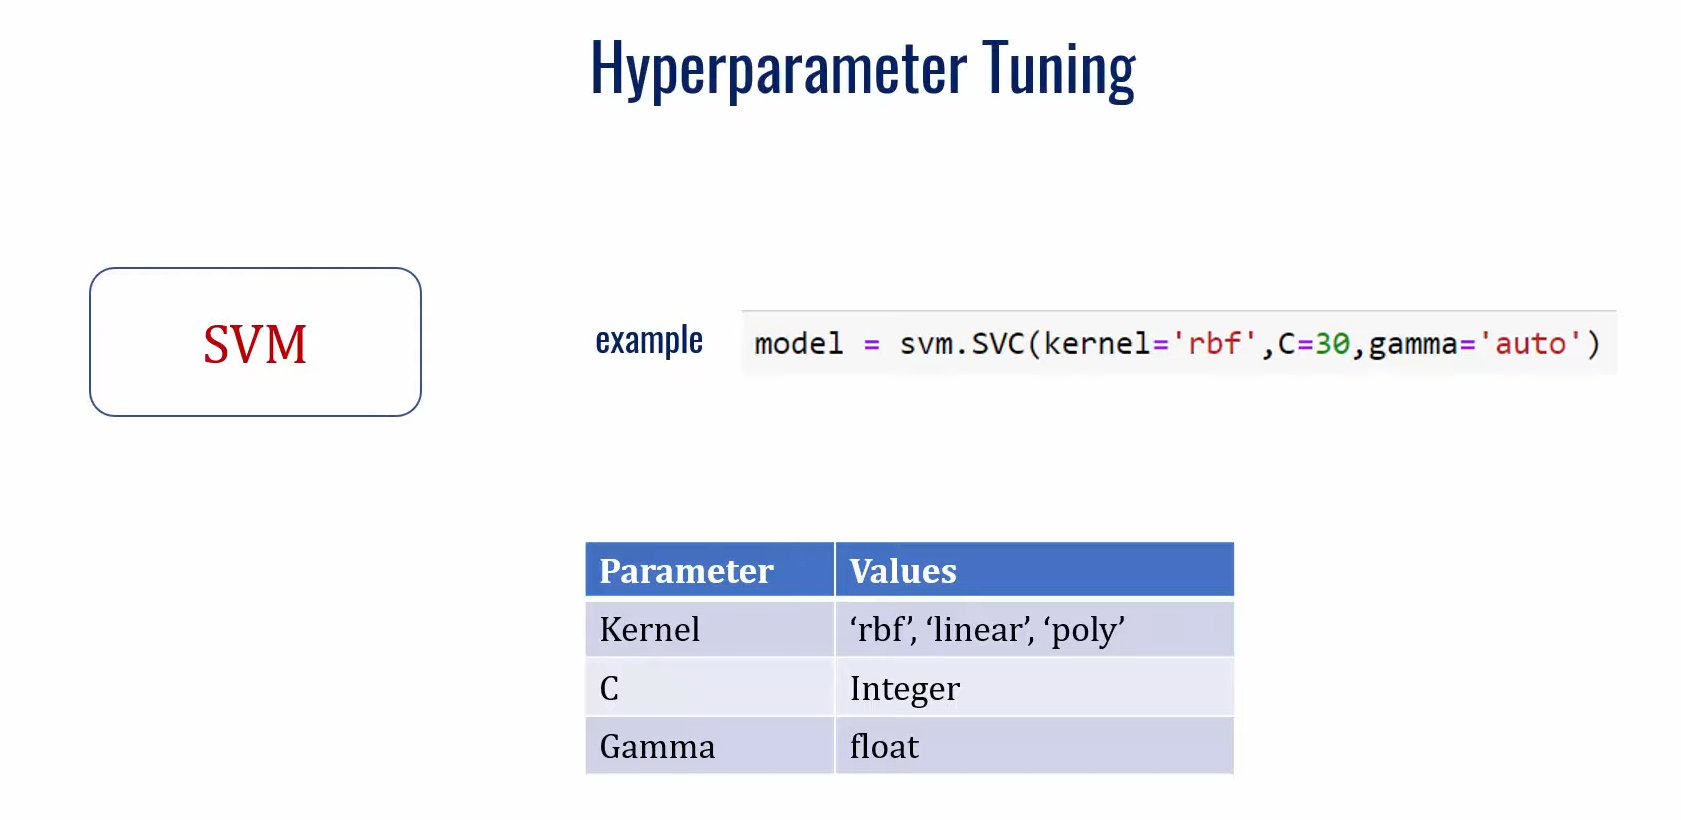

In [17]:
import pandas as pd
import numpy as np
from sklearn import svm , datasets

In [4]:

iris = datasets.load_iris()

df = pd.DataFrame( iris.data , columns=iris.feature_names )
df['flower'] = iris.target
df['flower'] = df['flower'].apply( lambda x : iris.target_names[x] )
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [11]:
from sklearn.model_selection import train_test_split 
xtr , xts , ytr , yts = train_test_split( iris.data , iris.target , test_size=0.3 )

In [12]:
svm_mod = svm.SVC( kernel = 'rbf' , C=30 , gamma='auto')
svm_mod.fit( xtr, ytr )
svm_mod.score( xts , yts )

0.9555555555555556

In [13]:
# USING cross_val_score we can compare the score of different train , test datasets .

from sklearn.model_selection import cross_val_score

cross_val_score( svm.SVC( kernel = 'linear' , C=10 , gamma='auto') , iris.data , iris.target , cv=5 )

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [14]:
cross_val_score( svm.SVC( kernel = 'rbf' , C=10 , gamma='auto') , iris.data , iris.target , cv=5 )

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [15]:
cross_val_score( svm.SVC( kernel = 'rbf' , C=20 , gamma='auto') , iris.data , iris.target , cv=5 )

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [18]:
# Brute force approch :

kernels = ['rbf' , 'linear']
C = [1 , 10 , 20 ]
avg_sc = {}

for ker in kernels :
    for c_val in C :
        cv_scr = cross_val_score( svm.SVC( kernel = ker , C = c_val , gamma='auto') , iris.data , iris.target , cv=5 )
        avg_sc[ ker + '_' + str(c_val) ] = np.average(cv_scr)

In [20]:
avg_sc

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [29]:
# instead ,we can use GridSearchCV ,where all these are done by itself\

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV( svm.SVC( gamma='auto' ) , {
        'C' : [1,10,20] ,
        'kernel' : ['rbf' , 'linear']
    } , cv=5 , return_train_score=False )

clf.fit( iris.data , iris.target )
clf.cv_results_

{'mean_fit_time': array([0.00140443, 0.0006207 , 0.00079322, 0.00089955, 0.00079503,
        0.00100589]),
 'std_fit_time': array([5.02706161e-04, 4.50822831e-04, 3.96640990e-04, 1.96828075e-04,
        3.97543305e-04, 7.14460567e-06]),
 'mean_score_time': array([0.        , 0.00020142, 0.00020194, 0.        , 0.00041738,
        0.        ]),
 'std_score_time': array([0.        , 0.00040283, 0.00040388, 0.        , 0.00051211,
        0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [30]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001404,0.000503,0.000000,0.000000,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000621,0.000451,0.000201,0.000403,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000793,0.000397,0.000202,0.000404,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000900,0.000197,0.000000,0.000000,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000795,0.000398,0.000417,0.000512,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001006,0.000007,0.000000,0.000000,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [31]:
df = df[['param_C' , 'param_kernel' , 'mean_test_score']]
df

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [32]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [33]:
clf.best_score_

0.9800000000000001

In [35]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [37]:
# This method cause high computation costs , to overcome this. We have another class : RandomizedSearchCV
# this choose random parameter and gives the results :


from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV( svm.SVC( gamma='auto') , {
    'C' : [1,10,20] , 
    'kernel' : ['rbf' , 'linear']
    } , cv=5 , return_train_score=False , n_iter=2 )

rs.fit( iris.data , iris.target )

df = pd.DataFrame( rs.cv_results_ )[['param_C' , 'param_kernel' , 'mean_test_score']]


In [39]:
df        

,param_C,param_kernel,mean_test_score
0,20,linear,0.966667
1,20,rbf,0.966667


How to choose best model for a given problem :

In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [45]:
scores = []

for model_name , mp in model_params.items() :
    
    clf = GridSearchCV( mp['model'] , mp['params'] , cv=5 , return_train_score=False )
    
    clf.fit(iris.data , iris.target )
    scores.append({
        'model':model_name ,
        'best_score':clf.best_score_ ,
        'best_params' :clf.best_params_
    })

In [46]:
scores

[{'model': 'svm',
  'best_score': 0.9800000000000001,
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': 0.9600000000000002,
  'best_params': {'n_estimators': 1}},
 {'model': 'logistic_regression',
  'best_score': 0.9666666666666668,
  'best_params': {'C': 5}}]

In [48]:
df2 = pd.DataFrame( scores , columns=['model' , 'best_score' , 'best_params'] )
df2

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 1}
2,logistic_regression,0.966667,{'C': 5}
